# POC for google Trends

(with hepl of ChatGPT prompt from other idea)
https://chat.openai.com/share/771322aa-1e85-45d2-9e7c-2089a7ddc5b7

## ressources
- https://pypi.org/project/pytrends/
- https://medium.com/@sinabaghaee96/data-extraction-from-google-trends-with-pytrends-1a89e33412bb

## Interpret "Interest over Time"

Interest over time*
Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

* Source: https://newsinitiative.withgoogle.com/en-gb/resources/trainings/fundamentals/google-trends-understanding-the-data/

In [124]:
import pandas as pd
import time

In [84]:


file_path = '../data/data_features.csv'

df = pd.read_csv(file_path)

categories = df.classification_product.unique()

categories  # [0] # get firest element ('E-Auto')
categories = categories.tolist()


In [85]:
categories

['E-Auto',
 'Auto',
 'Zubehör',
 'Motorrad',
 'Energie',
 'Verkehr',
 'Wallbox/Laden',
 'Solaranlagen',
 'E-Bike',
 'Fahrrad',
 'E-Scooter',
 'Solarspeicher',
 'Balkonkraftwerk',
 'Solargenerator',
 'THG',
 'Wärmepumpe',
 'Versicherung']

In [23]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

In [52]:
pytrends = TrendReq(hl='de-DE', tz=360)

In [8]:
# pytrends = TrendReq(hl='de-DE', tz=360, timeout=(10,25),  retries=2, backoff_factor=0.1)

##  if one gets a too many requests error one can try with a proxy server, see https://pypi.org/project/pytrends/

Valid Proxyserver has to be identified


In [1]:
# pytrends = TrendReq(hl='de-DE', tz=360, timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})

In [89]:
# timeframe = 'today 3-m' # Time frame: last 3 months ("today minus three months")
timeframe = '2023-01-01 2024-03-23'  # custom date range works but the retured values are binned week-wise
# timeframe = 'today 1-y'

In [116]:
category = ['E-Auto']

# Build the payload for the keyword
pytrends.build_payload(kw_list=category,
                       cat=0, # Category:0 for all categories (see https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories for all)
                       timeframe=timeframe,
                       geo='DE', # Geographic location, in this case 'Deutschland'
                       gprop='') # Google Search Property, e.g. 'images' Defaults to web searches

In [117]:
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df

In [122]:
related_queries = pytrends.related_queries()

In [123]:
related_queries['E-Auto']['top']

,query,value
0,e auto,100
1,e-auto laden,77
2,leasing e-auto,52
3,förderung e-auto,51
4,elektroauto,34
5,e-auto kaufen,31
6,e-auto ladestation,27
7,vw,22
8,e-auto reichweite,22
9,vw e-auto,21


## multiple articles

In [129]:
categories = ['E-Auto', 'E-Bike']
# Build the payload for the keyword
pytrends.build_payload(kw_list=categories,
                       cat=0, # Category:0 for all categories (see https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories for all)
                       timeframe=timeframe,
                       geo='DE', # Geographic location, in this case 'Deutschland'
                       gprop='') # Google Search Property, e.g. 'images' Defaults to web searches

In [76]:
interest_over_time_df = pytrends.interest_over_time()



In [77]:
interest_over_time_df

,E-Auto,E-Bike,isPartial
date,,,
2023-01-01,7,36,False
2023-01-08,9,36,False
2023-01-15,7,35,False
2023-01-22,8,32,False
2023-01-29,8,37,False
...,...,...,...
2024-02-18,9,52,False
2024-02-25,9,54,False
2024-03-03,9,66,False


In [92]:
interest_over_time_df.drop('isPartial', axis=1, inplace=True)

In [93]:
interest_over_time_df

,E-Auto,E-Bike
date,,
2023-01-01,7,36
2023-01-08,9,36
2023-01-15,7,35
2023-01-22,8,32
2023-01-29,8,37
...,...,...
2024-02-18,9,52
2024-02-25,9,54
2024-03-03,9,66


this matches the google trends UI
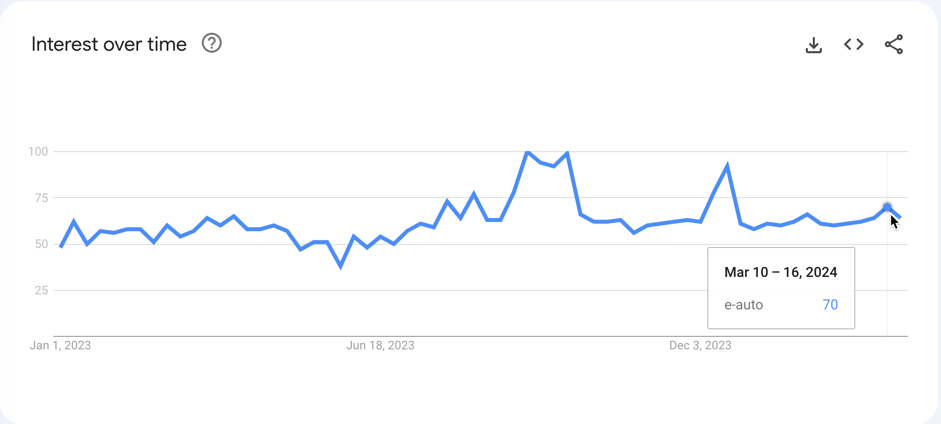

In [78]:
# related_topics = pytrends.related_topics() # will be empty if you request more than one keyword
related_queries = pytrends.related_queries()

In [80]:
related_topics['E-Auto']['top']

{}

In [83]:
# related_queries
df_related_queries_rising = related_queries['E-Auto']['top']
df_related_queries_rising

,query,value
0,e auto,100
1,e-auto laden,77
2,leasing e-auto,52
3,förderung e-auto,51
4,elektroauto,34
5,e-auto kaufen,31
6,e-auto ladestation,27
7,vw,22
8,e-auto reichweite,22
9,vw e-auto,21


In [49]:
dff = interest_over_time_df.reset_index() 

In [50]:
dff.drop('isPartial', axis=1, inplace= True)

In [51]:
dff

,date,E-Auto
0,2024-01-11,69
1,2024-01-12,78
2,2024-01-13,56
3,2024-01-14,49
4,2024-01-15,50
...,...,...
87,2024-04-07,54
88,2024-04-08,60
89,2024-04-09,67
90,2024-04-10,64


In [138]:
interest_over_time_df

""


In [101]:
interest_over_time_df.join(interest_over_time_df, how='inner', rsuffix='_' )

,E-Auto,E-Bike,E-Auto_,E-Bike_
date,,,,
2023-01-01,7,36,7,36
2023-01-08,9,36,9,36
2023-01-15,7,35,7,35
2023-01-22,8,32,8,32
2023-01-29,8,37,8,37
...,...,...,...,...
2024-02-18,9,52,9,52
2024-02-25,9,54,9,54
2024-03-03,9,66,9,66


In [131]:
pytrends.token_payload

{'hl': 'de-DE',
 'tz': 360,
 'req': '{"comparisonItem": [{"keyword": "E-Auto", "time": "2023-01-01 2024-03-23", "geo": "DE"}, {"keyword": "E-Bike", "time": "2023-01-01 2024-03-23", "geo": "DE"}], "category": 0, "property": ""}'}

In [137]:
keywords = categories

interest_over_time_df = pd.DataFrame()
related_queries = pd.DataFrame()
for kw in keywords:
    pytrends.build_payload(kw_list=kw,
                    cat=0, # Category:0 for all categories (see https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories for all)
                    timeframe=timeframe,
                    geo='DE', # Geographic location, in this case 'Deutschland'
                    gprop='') # Google Search Property, e.g. 'images' Defaults to web searches
    print(pytrends.token_payload)
    time.sleep(1)
    interest_over_time_df_iter = pytrends.interest_over_time()
    time.sleep(1)
    related_queries_iter = pytrends.related_queries()[kw]['top']

    interest_over_time_df.drop('isPartial', axis=1, inplace=True)
    interest_over_time_df.join(interest_over_time_df_iter, how='inner')

    related_queries_iter['classification_product'] = kw
    related_queries = pd.concat([related_queries, related_queries_iter])
    time.sleep(1)

 #   return interest_over_time_df, related_queries

ResponseError: The request failed: Google returned a response with code 400

In [136]:
get_google_trends(categories)


ProxyError: HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /trends/api/explore?hl=de-DE&tz=360&req=%7B%22comparisonItem%22%3A+%5B%7B%22keyword%22%3A+%22E%22%2C+%22time%22%3A+%222023-01-01+2024-03-23%22%2C+%22geo%22%3A+%22DE%22%7D%2C+%7B%22keyword%22%3A+%22-%22%2C+%22time%22%3A+%222023-01-01+2024-03-23%22%2C+%22geo%22%3A+%22DE%22%7D%2C+%7B%22keyword%22%3A+%22A%22%2C+%22time%22%3A+%222023-01-01+2024-03-23%22%2C+%22geo%22%3A+%22DE%22%7D%2C+%7B%22keyword%22%3A+%22u%22%2C+%22time%22%3A+%222023-01-01+2024-03-23%22%2C+%22geo%22%3A+%22DE%22%7D%2C+%7B%22keyword%22%3A+%22t%22%2C+%22time%22%3A+%222023-01-01+2024-03-23%22%2C+%22geo%22%3A+%22DE%22%7D%2C+%7B%22keyword%22%3A+%22o%22%2C+%22time%22%3A+%222023-01-01+2024-03-23%22%2C+%22geo%22%3A+%22DE%22%7D%5D%2C+%22category%22%3A+0%2C+%22property%22%3A+%22%22%7D (Caused by ProxyError('Unable to connect to proxy', ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x12b5ab1d0>, 'Connection to 118.97.107.65 timed out. (connect timeout=2)')))

In [125]:
categories

['E-Auto', 'E-Bike']

## next code block will not work as it returns a google error `too many requests`

I one executes the requests one after another manually it works

In [22]:
# Retrieve interest over time data
interest_over_time_df = pytrends.interest_over_time() # store the interest rate which is between 0 and 100
related_topics = pytrends.related_topics() # store related topics 
related_queries = pytrends.related_queries() # store related queries
dff = interest_over_time_df.reset_index() 
dff.drop('isPartial', axis=1, inplace= True)

TooManyRequestsError: The request failed: Google returned a response with code 429